#  Runtime analysis of standard deviation

In [2]:
%load_ext autoreload
%autoreload 2
import preprocessing.utils_script as utils
from preprocessing.utils import convert_leaf_to_json, get_predicates_from_path, ground_truth_distibution, load_BGPS_from_json

from graph_construction.bgp import BGP
from graph_construction.triple_pattern import TriplePattern
import json
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt

In [4]:
utils.print_latency_stats('/work/data/data_files/processed_gt.json')

Statistics for /work/data/data_files/processed_gt.json
	Median: 37110725.0
	Std: 35512610083.66495
	Average: 6245465617.218956
	25%-quantile: 9363332.0
	75%-quantile: 319409687.0


Here analyse the runtime information

In [8]:
#bgps=load_BGPS_from_json('/work/data/data_files/processed_gt.json')
bgps = json.load(open('/work/data/data_files/processed_gt.json', 'r'))
jena_rt = utils.get_runtimes(bgps)
rt = [x*1e-9 for x in jena_rt] # nanoseocnd to seconds
mean_jena = np.mean(jena_rt)
#utils.print_latency_stats()

Basic Statisctics

In [9]:
print("Mean ", np.mean(rt))
print("STD ", np.std(rt))
print("Min ", np.min(rt))
print("25% ", np.quantile(rt,q=0.25))
print("50% ", np.quantile(rt,q=0.5))
print("75% ", np.quantile(rt,q=0.75))
print("Max ", np.max(rt))

Mean  6.245465617218957
STD  35.512610083664946
Min  0.0018909760000000002
25%  0.009363332
50%  0.037110725000000004
75%  0.319409687
Max  669.669106324


{'whiskers': [<matplotlib.lines.Line2D at 0x7f08748fd240>,
 'caps': [<matplotlib.lines.Line2D at 0x7f08748fd7b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f08748fd0c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f08748fdcf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f08748fdf90>],
 'means': []}

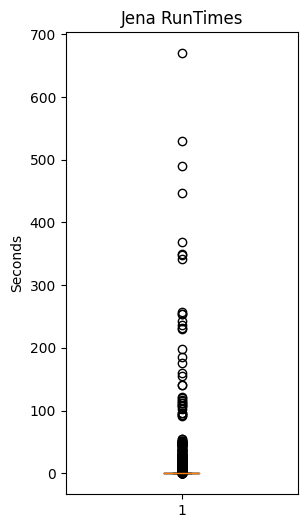

In [16]:
plt.figure(figsize=(3,6))
plt.ylabel('Seconds')
plt.title('Jena RunTimes')
plt.boxplot(rt)

Actual Relative Error

In [21]:
def relative_error(pred, gt):
    return (gt- pred)/gt

In [27]:
re_median = [relative_error( x, np.median(rt)) for x in rt]
print(np.median(rt))
print(np.sum(list(map(abs,re_median)))/len(re_median))

0.037110725000000004
167.96652036398834


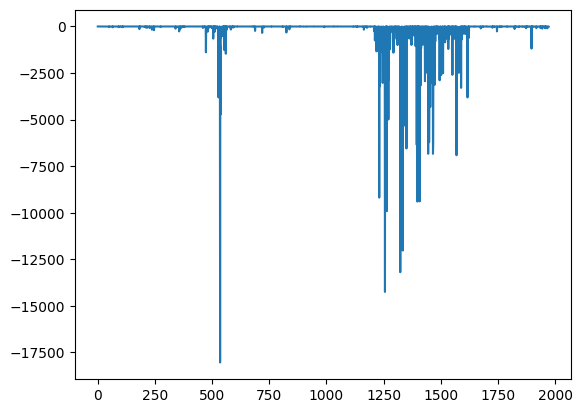

In [23]:
plt.plot(re_median)